# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

I did 1 and 5

In [4]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 42 (delta 6), reused 2 (delta 2), pack-reused 30
Receiving objects: 100% (42/42), 2.49 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (8/8), done.


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("/content/linearRegression/data/Q1_clean.csv", low_memory=False)
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [61]:
df['Neighborhood'] = df['Neighbourhood ']
df.loc[:,['Price','Neighborhood'] ].groupby('Neighborhood').describe()

Price                                                      \
                 count        mean         std   min     25%    50%    75%   
Neighborhood                                                                 
Bronx            217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn        8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan      11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens          1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island     96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                        
                   max  
Neighborhood            
Bronx            244.0  
Brooklyn        4500.0  
Manhattan      10000.0  
Queens           950.0  
Staten Island   5000.0

In [62]:
df.loc[:,['Review Scores Rating', 'Neighborhood']].groupby('Neighborhood').describe()

Review Scores Rating                                         \
                             count       mean       std   min   25%   50%   
Neighborhood                                                                
Bronx                        217.0  91.654378  8.169239  60.0  88.0  93.0   
Brooklyn                    8487.0  92.363497  8.656563  20.0  90.0  94.0   
Manhattan                  11763.0  91.801496  8.840889  20.0  88.0  93.0   
Queens                      1590.0  91.549057  9.895860  20.0  88.0  94.0   
Staten Island                 96.0  90.843750  9.137923  40.0  87.0  92.0   

                             
                 75%    max  
Neighborhood                 
Bronx           99.0  100.0  
Brooklyn       100.0  100.0  
Manhattan       99.0  100.0  
Queens         100.0  100.0  
Staten Island   97.0  100.0

Manhattan is the most expensive on average.

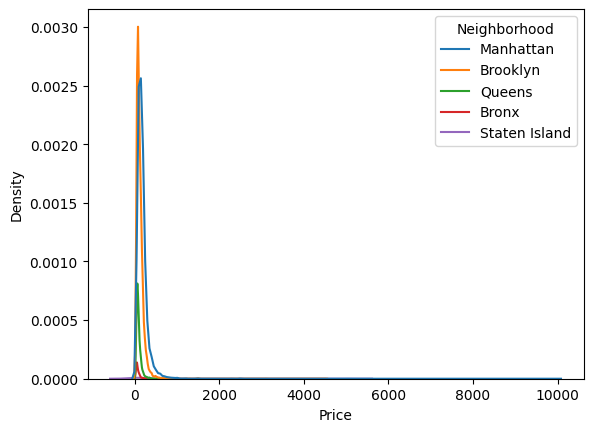

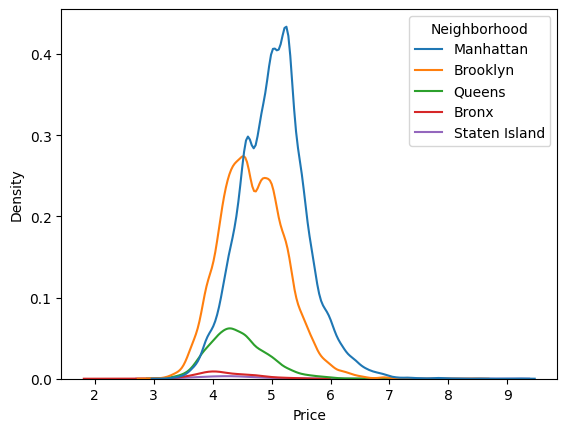

In [63]:
sns.kdeplot(x=df['Price'], hue=df['Neighborhood'])
plt.show()
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighborhood'])
plt.show()


2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?



In [67]:
from sklearn import linear_model
y = df['Price']
X = pd.get_dummies(df['Neighborhood'], dtype='int')
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The more expensive neighborhoods have a higher coefficients. For instance, the cheapest neighborhood, The Bronx, has the lowest coefficient, while the most expensive neighborhood, Manhattan, has the highest coefficient. These values actually appear to be identical, as well with the other Neighborhoods

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [68]:
X = pd.get_dummies(df['Neighborhood'], dtype='int', drop_first = True)
reg = linear_model.LinearRegression().fit(X,y)
results = pd.DataFrame({'variable':reg.feature_names_in_,'coefficient':reg.coef_})
print(reg.intercept_)
results


75.27649769585331


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


Dropping the first value is necessary when creating the Dummy values. This dropped the Bronx, and made it the value for the intercept. Adding the intercept with the regression coefficient values will get the old coefficients. So, all the values are relative to the Bronx now.


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [70]:
from sklearn.model_selection import train_test_split
X = df.loc[:,['Review Scores Rating', 'Neighborhood'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighborhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighborhood'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933
SSE: 69246472.83840963


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [20]:
print(100* 1.032257 + 89.4)

192.6257


The most expensive property you can rent is a 100 RSR in Manhattan for 192.64 per night


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [72]:
X = df.loc[:,['Review Scores Rating', 'Neighborhood', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighborhood'], dtype='int'),
                     pd.get_dummies(X_train['Room Type'], dtype='int')],
                     axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighborhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [23]:
100*0.626912 + 53.693304 + 110.617820

227.002324

The most expensive property you can rent is an Entire home/apt in Manhattan with 100 Review Scores Rating, at the price shown above.



6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


The coefficient on Review Scores Rating is the amount that Review Scores influences the price per night. When the information on property type was included in the multiple linear regression in part 5, the impact of the coefficient became lessened, as property type has a strong impact on the price.


7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

I'm looking at a Spotify Track dataset from Kaggle. (https://www.kaggle.com/code/sagravela/spotifysongs-eda) I'm wondering how the values Spotify assigns to acousticness, danceability, etc relate to the popularity of a song.

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
df = pd.read_csv('/content/drive/MyDrive/spotify_songs.csv', low_memory=False)

In [130]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [131]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [81]:
df.isna().sum()
df = df.dropna()

In [132]:
df.corr()

<ipython-input-132-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.064748,-0.109112,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
danceability,0.064748,1.000000,-0.086073,0.011736,0.025335,-0.058647,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879
energy,-0.109112,-0.086073,1.000000,0.010052,0.676625,-0.004800,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611
key,-0.000650,0.011736,0.010052,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139
loudness,0.057687,0.025335,0.676625,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058
mode,0.010637,-0.058647,-0.004800,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634
speechiness,0.006819,0.181721,-0.032150,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431
acousticness,0.085159,-0.024519,-0.539745,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581
instrumentalness,-0.149872,-0.008655,0.033247,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235
liveness,-0.054584,-0.123859,0.161223,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138


It seems like duration, energy, instrumentalness, acousticness, are the most important factors for determining the popularity of a song. Longer, instrumental, and energetic songs seem to be less popular, which is what I would expect.

None of these are really categorical variables, so not much of a need for dummy variables. There are categorical variables, but they don't seem to have much of an impact on the popularity of the song.

In [83]:
sorted_df = df.sort_values(by='track_popularity', ascending=False)
sorted_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19460,4HCsKNye8SYImpwXnurwmN,Prrrum - Remix,Cosculluela,0,4lAJ5MS5BlXfyC03rii98I,The Ones,2015-09-25,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,1,-3.076,1,0.2910,0.1670,0.000000,0.0721,0.727,90.034,253600
11652,1TO1KYnFeSUqyRWuprjmZz,Echoes,Camel,0,17OeQWykxZnGWKDWNW5ofz,Breathless,1978-01-01,Progressive Rock / Metal - Rock /Metal Progre...,7GhTpb4eOp6403Bmgqz3db,rock,...,10,-8.483,1,0.0309,0.0107,0.023200,0.0999,0.436,153.479,440267
11647,3suGVjo7xyvFbK0WHbDlUA,Lua Lua Lua - Live,Miguel Rios,0,5fstCqs5NpIlF42VhPNv23,Rock & Rios (Remastered),2005-01-01,Rock and Rios,2gpKfzXEi8QWvgBNPDPk5R,rock,...,5,-10.093,1,0.1010,0.0256,0.000253,0.9670,0.508,95.009,196320
19457,4PslQxk22ZmgBrUHmDfy7n,Bailarina,J Alvarez,0,2VP0irbKxiDWd76WpCUtFu,Lo Que No Puede Faltar En Tu Colección,2014-10-17,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,6,-5.957,0,0.0384,0.7770,0.000010,0.1410,0.739,89.820,227000


In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['duration_norm'] = scaler.fit_transform(df[['duration_ms']])

In [134]:
from sklearn.model_selection import train_test_split
y = df['track_popularity']
X = df.loc[:,['instrumentalness', 'acousticness', 'duration_norm', 'energy'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = X_train.copy()
Z_test = X_test.copy()

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
sse = np.sum((y_test - y_hat)**2)
print('SSE:', sse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  -0.09264817810337989
RMSE:  26.057476897880992
SSE: 4458941.135696411


,variable,coefficient
0,instrumentalness,-15.902599
1,acousticness,32.739201
2,duration_norm,22.113703
3,energy,38.845655


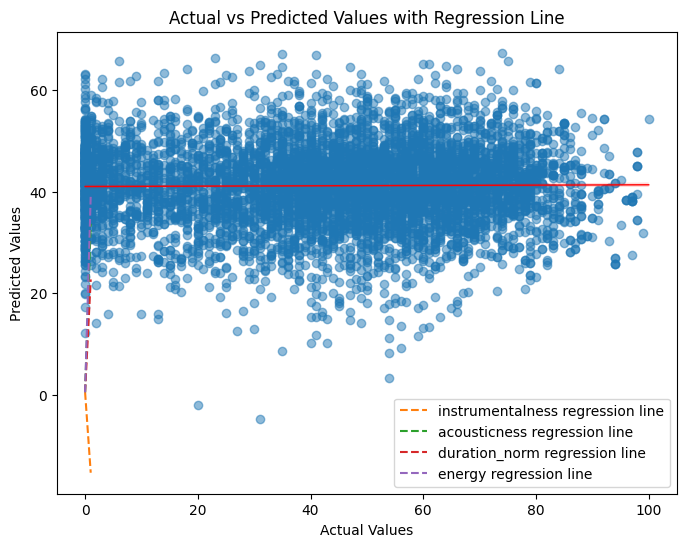

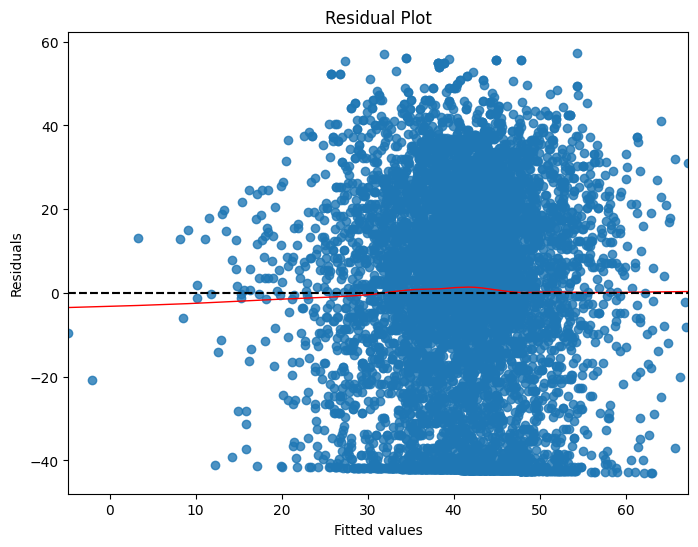

In [135]:
#From ChatGPT

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_hat, line_kws={'color': 'red', 'lw': 1}, scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')

# Plotting the regression line manually with the given coefficients
coefficients = [-15.849597, 33.137835, 22.190859, 38.694950]
x_values = [0, 1]
for i, coef in enumerate(coefficients):
    y_values = [coef * x + 0.5 for x in x_values]  # Adding 0.5 for better visualization due to the range of values
    plt.plot(x_values, y_values, linestyle='--', label=f'{X.columns[i]} regression line')

plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_hat
plt.figure(figsize=(8, 6))
sns.residplot(x=y_hat, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


All of these values range from 0 to 1, so this is basically saying that the popularity of a song is positvely correlated with acousticsness, duration, and energy, while it is negatively impacted with instrumentalness.

This is a little surprising to me, given that duration and energy had strong *negative* impacts before.


In [136]:
# Accounting for a few more variables
from sklearn.model_selection import train_test_split
y = df['track_popularity']
X = df.loc[:,['instrumentalness', 'acousticness', 'duration_norm', 'energy', 'danceability', 'loudness'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = X_train.copy()
Z_test = X_test.copy()

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
sse = np.sum((y_test - y_hat)**2)
print('SSE:', sse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results


Rsq:  -0.015163494261897892
RMSE:  25.116561553378098
SSE: 4142737.2092258306


,variable,coefficient
0,instrumentalness,-17.037894
1,acousticness,18.422312
2,duration_norm,-3.500979
3,energy,20.978692
4,danceability,35.112240
5,loudness,-0.592019


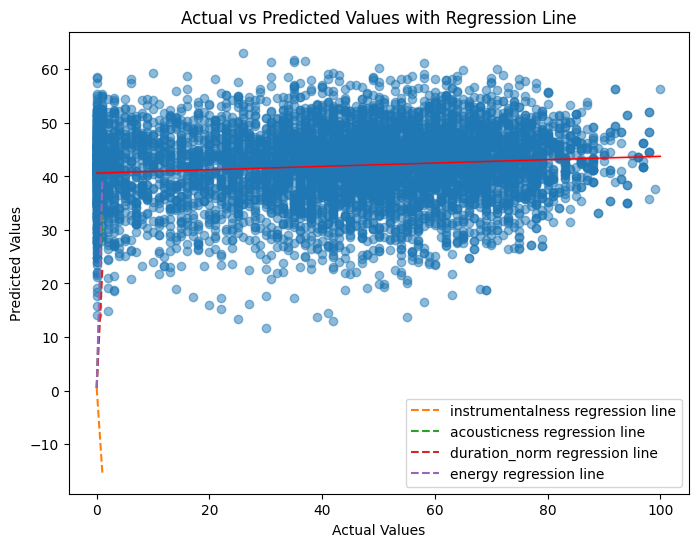

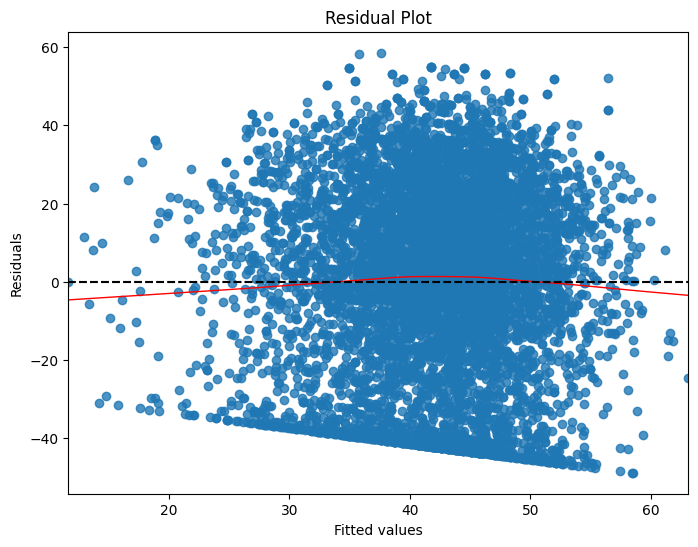

In [137]:
# From ChatGPT
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_hat, line_kws={'color': 'red', 'lw': 1}, scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')

# Plotting the regression line manually with the given coefficients
coefficients = [-15.849597, 33.137835, 22.190859, 38.694950]
x_values = [0, 1]
for i, coef in enumerate(coefficients):
    y_values = [coef * x + 0.5 for x in x_values]  # Adding 0.5 for better visualization due to the range of values
    plt.plot(x_values, y_values, linestyle='--', label=f'{X.columns[i]} regression line')

plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_hat
plt.figure(figsize=(8, 6))
sns.residplot(x=y_hat, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


In [138]:
df['predicted_track_popularity'] = reg.predict(df[['instrumentalness', 'acousticness', 'duration_norm', 'energy', 'danceability', 'loudness']])
sorted_df = df[['track_name','track_artist','track_popularity','predicted_track_popularity']].sort_values(by='track_popularity', ascending=False)
sorted_df

,track_name,track_artist,track_popularity,predicted_track_popularity
20091,Dance Monkey,Tones and I,100,56.403541
1551,Dance Monkey,Tones and I,100,56.403541
30202,ROXANNE,Arizona Zervas,99,37.611597
23104,ROXANNE,Arizona Zervas,99,37.611597
21468,ROXANNE,Arizona Zervas,99,37.611597
...,...,...,...,...
15604,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,43.700126
4977,Stone,JOY.,0,38.611764
4975,Walk Away,LANY,0,28.372435
11326,The Back Seat Of My Car,Paul McCartney,0,37.119598


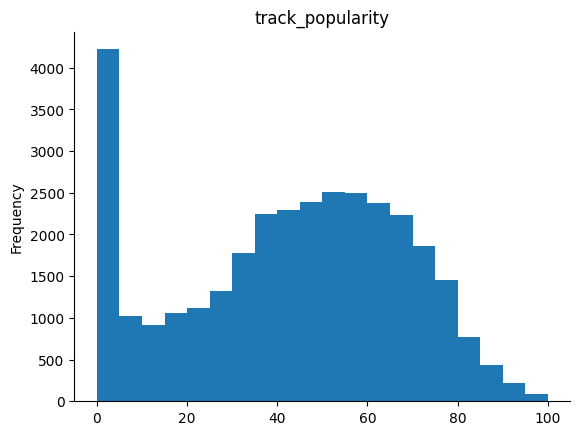

In [111]:
# @title track_popularity

from matplotlib import pyplot as plt
sorted_df['track_popularity'].plot(kind='hist', bins=20, title='track_popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Neither model seems to be GREAT at predicting populartiy, but the second model has a lower RMSE and visually appears to be better at predicting values.

I would imagine track popularity is a difficult thing to predict, at least with variables that describe the music itself. I would guess track popularity is more influenced by the social impact of the artist rather than the music itself. I would also guess that track popularity is more influenced by the financial ability of the artist as well.

Looking at this graph that was auto created by Colab, i think it may have been beneficial to sclae the track_popularity value, though i dont think the prediction would have been great either way.
